# Efficiently searching for optimal tuning parameters
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

## Review of K-fold cross-validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Review of parameter tuning using `cross_val_score`

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [6]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
    print(scores.mean())

0.96
0.953333333333
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.973333333333
0.966666666667


In [7]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [8]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []

for k in k_range:
    #instantiate knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #run cross validation and keep the score
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

    #add mean score to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validated Accuracy')

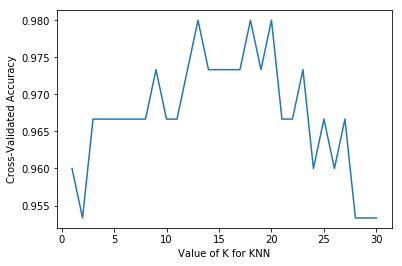

In [9]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Exercise: 

- Add the weight hyperparameter to the existing code (use uniform and distance)
- Store the k value, weight, and score
- Create a DataFrame with the results, provide it column names, order sort it to show the hyperparameters for the top 5 results

### Exercise: 

- Add the metric hyperparameter to the existing code (use minkowski and manhattan)
- Store the k value, weight, metric, and score
- Create a DataFrame with the results, provide it column names, order sort it to show the hyperparameters for the top 5 results

## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [36]:
from sklearn.model_selection import GridSearchCV

In [48]:
# define the parameter values that should be searched
k_range = list(range(10, 20))
print(k_range)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [49]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [50]:
knn = KNeighborsClassifier()

In [51]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

In [52]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [56]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([ 0.        ,  0.00100296,  0.00110309,  0.00312505,  0.        ,
         0.00156002,  0.00156283,  0.00020058,  0.00156274,  0.00233285]),
 'mean_score_time': array([ 0.00468831,  0.00670743,  0.00386858,  0.00937598,  0.00312567,
         0.        ,  0.00468798,  0.00636261,  0.00156326,  0.0018631 ]),
 'mean_test_score': array([ 0.96666667,  0.96666667,  0.97333333,  0.98      ,  0.97333333,
         0.97333333,  0.97333333,  0.97333333,  0.98      ,  0.97333333]),
 'mean_train_score': array([ 0.9762963 ,  0.98      ,  0.97851852,  0.98      ,  0.97925926,
         0.97925926,  0.97777778,  0.97777778,  0.97777778,  0.97777778]),
 'param_n_neighbors': masked_array(data = [10 11 12 13 14 15 16 17 18 19],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': [{'n_neighbors': 10},
  {'n_neighbors': 11},
  {'n_neighbors': 12},
  {'n_neighbors': 13},
  {'n_neighbors': 14},
  {'n_neighbors': 15},
 

In [65]:
# examine the first tuple
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 10}
0.966666666667


In [68]:
# create a list of the mean scores only
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

[0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338]


Text(0,0.5,'Cross-Validated Accuracy')

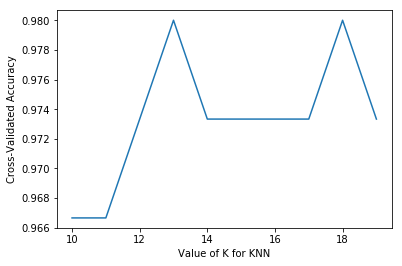

In [69]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [70]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Exercise

- Create a GridSearchCV using a RandomForestClassifier 
- Create a param_grid to test 20 values for n_estimators

## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [83]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [84]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [85]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
# view the complete results
grid.grid_scores_

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [87]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [90]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [91]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array([1])

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [100]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=5, return_train_score=True)
rand.fit(X, y)
rand.cv_results_

{'mean_fit_time': array([ 0.        ,  0.00156279,  0.        ,  0.00695233,  0.0004009 ,
         0.0015666 ,  0.00176241,  0.00402787,  0.0015635 ,  0.        ]),
 'mean_score_time': array([ 0.00156202,  0.00156252,  0.00312464,  0.00256088,  0.00236499,
         0.0031245 ,  0.00352218,  0.00527253,  0.00312448,  0.        ]),
 'mean_test_score': array([ 0.97333333,  0.96666667,  0.98      ,  0.96666667,  0.95333333,
         0.97333333,  0.96666667,  0.97333333,  0.97333333,  0.97333333]),
 'mean_train_score': array([ 1.        ,  0.97111111,  0.97777778,  0.96148148,  0.95925926,
         1.        ,  1.        ,  0.97925926,  1.        ,  0.97925926]),
 'param_n_neighbors': masked_array(data = [16 22 18 27 29 10 22 14 12 15],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_weights': masked_array(data = ['distance' 'uniform' 'uniform' 'uniform' 'uniform' 'distance' 'distance'
  'uniform' 'distance' 'uniform'],
  

In [101]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [98]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998]


### Exercise

- Create a RandomizedSearchCV using a RandomForestClassifier 
- Create a param_grid to test 20 values for n_estimators and 5 values for min_samples_leaf

### Pipeline

In [105]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.95333333333333337

In [1]:
# create a pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# search for an optimal n_neighbors value using GridSearchCV
neighbors_range = list(range(1, 21))
mean_options = [True,False]

#create a param grid
param_grid = dict(standardscaler__with_mean=mean_options, kneighborsclassifier__n_neighbors=neighbors_range)

# create a grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# fit the grid
grid.fit(X, y)

# view the best_score_ and best_params_
print(grid.best_score_)
print(grid.best_params_)

### Exercise

- creat pipeline with a standardscaler and a randomforestclassifier
- add hyperparameters to both steps in the pipeline

In [2]:
# create a pipeline

# search for an optimal n_neighbors value using GridSearchCV

#create a param grid

# create a grid search

# fit the grid

# view the best_score_ and best_params_


### Pipelines

In [ ]:
# read three columns from the dataset into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['label', 'color', 'proline']
wine = pd.read_csv(url, header=None, names=col_names, usecols=[0, 10, 13])

In [ ]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [ ]:
# proper cross-validation on the original (unscaled) data
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.cross_validation import cross_val_score
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

In [ ]:
# why is this improper cross-validation on the scaled data?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

### How does Pipeline solve the problem?

[Pipeline](http://scikit-learn.org/stable/modules/pipeline.html) is used for chaining steps together:

In [ ]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

Pipeline can also be used with [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) for parameter searching:

In [ ]:
# search for an optimal n_neighbors value using GridSearchCV
neighbors_range = list(range(1, 21))

### param_grid = dict(n_neighbors=k_range, weights=weight_options)
param_grid = dict(kneighborsclassifier__n_neighbors=neighbors_range)

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)